# Codealong 05

Categorical variable - values are disjoint but differences matter (e.g. blood type) <br>
Ordinal variable - order matters, but difference doesn't as much (e.g. movie ratings) <br>
Interval variable - ordinal variable but difference means something (e.g. temperature) <br>
Ratio variable - interval variable + '0' means non-existent (e.g. income) <br>

In [1]:
import os
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import feature_selection, linear_model
from mpl_toolkits.mplot3d import Axes3D

pd.set_option('display.max_rows', 10)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

%matplotlib inline
plt.style.use('ggplot')

## Activity: Model's F-statistic

In [3]:
df = pd.read_csv(os.path.join('zillow-05-starter.csv'), index_col = 'ID')
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.710,0.0,1.0,NaN,0.550,NaN,1980.0
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.150,0.0,NaN,2.0,1.430,2.435,1948.0
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.600,0.0,2.0,3.5,2.040,3.920,1976.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.500,0.0,1.0,1.0,1.060,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.970,0.0,2.0,2.0,1.299,NaN,1993.0
...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,0.390,1.0,NaN,1.0,0.264,NaN,2012.0
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,0.860,0.0,1.0,1.0,0.691,NaN,2004.0
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,0.830,0.0,3.0,3.0,1.738,2.299,1976.0


In [3]:
model = smf.ols(formula = 'SalePrice ~ IsAStudio', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.07775
Date:                Fri, 13 May 2016   Prob (F-statistic):              0.780
Time:                        14:20:09   Log-Likelihood:                -1847.4
No. Observations:                 986   AIC:                             3699.
Df Residuals:                     984   BIC:                             3709.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.3811      0.051     27.088      0.000         1.281     1.481
IsAStudio      0.0829      0.297      0.279      0.780        -0.501     0.666
==============================================================================
Omnibus:                     1682.807   Durbin-Watson:                   1.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1342290.714
Skew:                          10.942   Prob(JB):                         0.00
Kurtosis:                     182.425   Cond. No.                         5.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Accessing the model's F-value and its p-value

### F-value (with significance level of `5%`)

In [4]:
model.fvalue

0.077751247187816605

### Corresponding p-value

In [5]:
model.f_pvalue

0.78042689060360249

## Part A - Linear Modeling with `scikit-learn`

In [6]:
subset_df = df.dropna(axis = 'index', subset = ['Size', 'LotSize', 'IsAStudio'])

In [7]:
def linear_modeling_with_sklearn(X, y):
    model = linear_model.LinearRegression(fit_intercept = True)
    model.fit(X, y)

    print 'F-statistic (performed for each regressor independently)'
    print '- F-value', feature_selection.f_regression(X, y)[0]
    print '- p-value', feature_selection.f_regression(X, y)[1]
    print 'R^2 =', model.score(X, y)
    print 'Coefficients'
    print '- beta_0 (intercept) =', model.intercept_
    print '- beta_n (n > 0)     =', model.coef_

### SalePrice ~ IsAStudio with `smf.ols`

In [8]:
smf.ols(formula = 'SalePrice ~ IsAStudio', data = subset_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2519
Date:                Fri, 13 May 2016   Prob (F-statistic):              0.616
Time:                        14:20:10   Log-Likelihood:                -1159.0
No. Observations:                 545   AIC:                             2322.
Df Residuals:                     543   BIC:                             2331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.5571      0.088     17.615      0.000         1.383     1.731
IsAStudio      0.2589      0.516      0.502      0.616        -0.755     1.272
==============================================================================
Omnibus:                      860.527   Durbin-Watson:                   1.337
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           301122.117
Skew:                           8.992   Prob(JB):                         0.00
Kurtosis:                     116.741   Cond. No.                         5.93
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### SalePrice ~ IsAStudio with `scikit-learn` (Simple Linear Modeling)

In [9]:
X = subset_df[ ['IsAStudio'] ]
y = subset_df['SalePrice']

linear_modeling_with_sklearn(X, y)

F-statistic (performed for each regressor independently)
- F-value [ 0.25187926]
- p-value [ 0.61595836]
R^2 = 0.000463650973037
Coefficients
- beta_0 (intercept) = 1.55707559924
- beta_n (n > 0)     = [ 0.2589244]


### SalePrice ~ Size + LotSize with `smf.ols`

In [10]:
smf.ols(formula = 'SalePrice ~ Size + LotSize', data = subset_df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     78.29
Date:                Fri, 13 May 2016   Prob (F-statistic):           1.36e-30
Time:                        14:20:10   Log-Likelihood:                -1090.0
No. Observations:                 545   AIC:                             2186.
Df Residuals:                     542   BIC:                             2199.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -0.1902      0.173     -1.098      0.273        -0.530     0.150
Size           0.8171      0.069     11.907      0.000         0.682     0.952
LotSize        0.0500      0.037      1.362      0.174        -0.022     0.122
==============================================================================
Omnibus:                      974.589   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           812622.772
Skew:                          11.225   Prob(JB):                         0.00
Kurtosis:                     190.833   Cond. No.                         9.81
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### SalePrice ~ IsAStudio with `scikit-learn` (Multiple Linear Modeling)

In [11]:
X = subset_df[ ['Size', 'LotSize'] ]
y = subset_df['SalePrice']

linear_modeling_with_sklearn(X, y)

F-statistic (performed for each regressor independently)
- F-value [ 154.47734612   11.74608887]
- p-value [  2.18094764e-31   6.55921409e-04]
R^2 = 0.224134357118
Coefficients
- beta_0 (intercept) = -0.190237755455
- beta_n (n > 0)     = [ 0.81709073  0.05004893]


# Advertising dataset

In [12]:
df = pd.read_csv(os.path.join('advertising.csv'))

In [13]:
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
193,38.2,3.7,13.8,7.6
194,94.2,4.9,8.1,9.7
195,177.0,9.3,6.4,12.8
196,283.6,42.0,66.2,25.5


## Plots

### Sales ~ TV

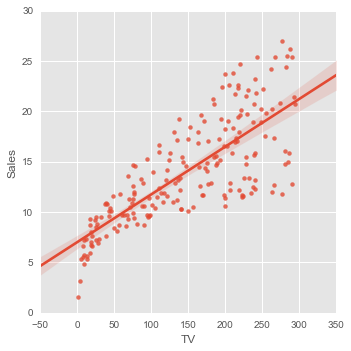

In [14]:
sns.lmplot('TV','Sales',df)

### Sales ~ Radio

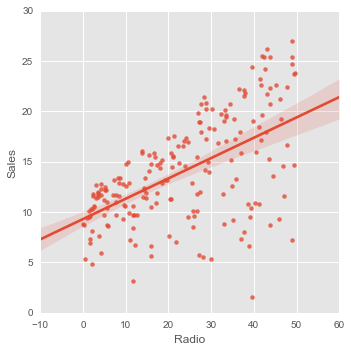

In [15]:
sns.lmplot('Radio','Sales',df)

### Sales ~ Newspaper

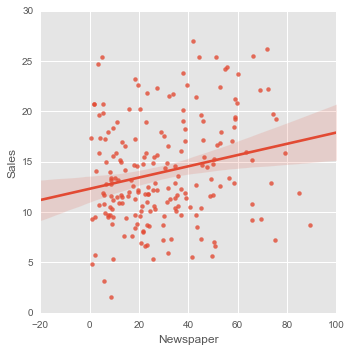

In [16]:
sns.lmplot('Newspaper','Sales',df)

## Simple linear regressions

### Sales ~ TV

In [17]:
model_tv = smf.ols(formula = 'Sales ~ TV', data = df).fit()
model_tv.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     302.8
Date:                Fri, 13 May 2016   Prob (F-statistic):           1.29e-41
Time:                        14:20:11   Log-Likelihood:                -514.27
No. Observations:                 198   AIC:                             1033.
Df Residuals:                     196   BIC:                             1039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      7.0306      0.462     15.219      0.000         6.120     7.942
TV             0.0474      0.003     17.400      0.000         0.042     0.053
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.551
Skew:                          -0.062   Prob(JB):                        0.759
Kurtosis:                       2.774   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Sales ~ Radio

In [18]:
model_radio = smf.ols(formula = 'Sales ~ Radio', data = df).fit()
model_radio.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     97.69
Date:                Fri, 13 May 2016   Prob (F-statistic):           5.99e-19
Time:                        14:20:11   Log-Likelihood:                -566.70
No. Observations:                 198   AIC:                             1137.
Df Residuals:                     196   BIC:                             1144.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      9.3166      0.560     16.622      0.000         8.211    10.422
Radio          0.2016      0.020      9.884      0.000         0.161     0.242
==============================================================================
Omnibus:                       20.193   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.115
Skew:                          -0.785   Prob(JB):                     9.56e-06
Kurtosis:                       3.582   Cond. No.                         51.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Sales ~ Newspaper

In [19]:
model_newspaper = smf.ols(formula = 'Sales ~ Newspaper', data = df).fit()
model_newspaper.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     9.927
Date:                Fri, 13 May 2016   Prob (F-statistic):            0.00188
Time:                        14:20:11   Log-Likelihood:                -601.84
No. Observations:                 198   AIC:                             1208.
Df Residuals:                     196   BIC:                             1214.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     12.3193      0.639     19.274      0.000        11.059    13.580
Newspaper      0.0558      0.018      3.151      0.002         0.021     0.091
==============================================================================
Omnibus:                        5.835   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.303
Skew:                           0.333   Prob(JB):                       0.0706
Kurtosis:                       2.555   Cond. No.                         63.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Residuals

### Sales ~ TV

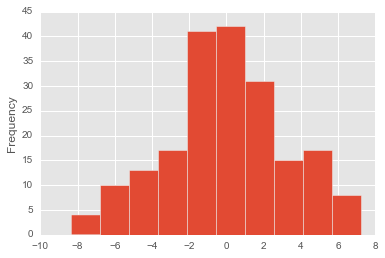

In [20]:
model_tv.resid.plot(kind = 'hist', bins = 10)

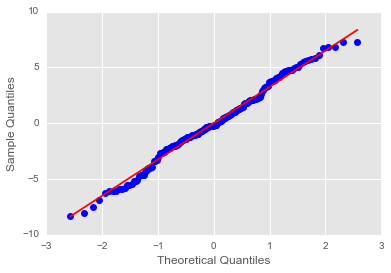

In [21]:
figure = sm.qqplot(model_tv.resid, line = 's')

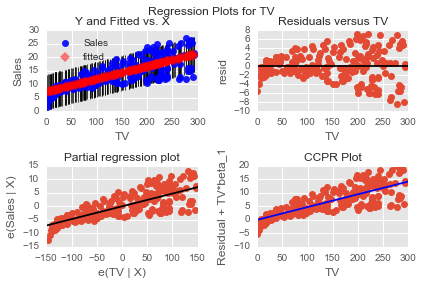

In [22]:
figure = sm.graphics.plot_regress_exog(model_tv, 'TV')

### Sales ~ Radio

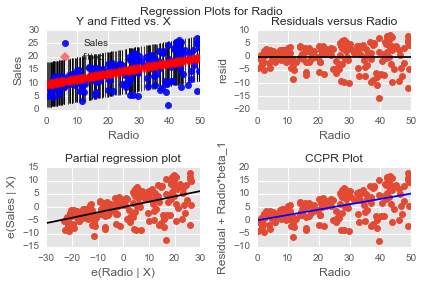

In [23]:
figure = sm.graphics.plot_regress_exog(model_radio, 'Radio')

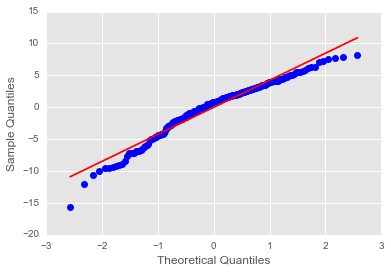

In [24]:
figure = sm.qqplot(model_radio.resid, line = 's')

### Sales ~ Newspaper

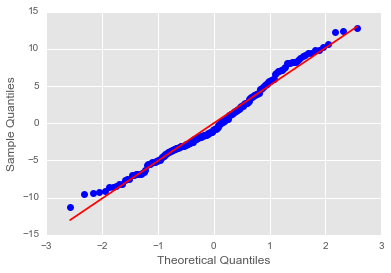

In [25]:
figure = sm.qqplot(model_newspaper.resid, line = 's')

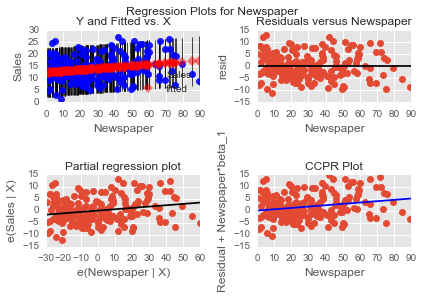

In [26]:
figure = sm.graphics.plot_regress_exog(model_newspaper, 'Newspaper')

### Sales ~ TV + Radio + Newspaper

In [27]:
model = smf.ols(formula = 'Sales ~ TV + Radio + Newspaper', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Fri, 13 May 2016   Prob (F-statistic):           8.35e-95
Time:                        14:20:14   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.000         2.325     3.580
TV             0.0457      0.001     32.293      0.000         0.043     0.048
Radio          0.1886      0.009     21.772      0.000         0.171     0.206
Newspaper     -0.0012      0.006     -0.187      0.852        -0.014     0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         457.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Sales ~ TV + Radio

In [28]:
model = smf.ols(formula = 'Sales ~ TV + Radio', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     834.4
Date:                Fri, 13 May 2016   Prob (F-statistic):           2.60e-96
Time:                        14:20:14   Log-Likelihood:                -383.26
No. Observations:                 198   AIC:                             772.5
Df Residuals:                     195   BIC:                             782.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9315      0.297      9.861      0.000         2.345     3.518
TV             0.0457      0.001     32.385      0.000         0.043     0.048
Radio          0.1880      0.008     23.182      0.000         0.172     0.204
==============================================================================
Omnibus:                       59.228   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.127
Skew:                          -1.321   Prob(JB):                     3.06e-32
Kurtosis:                       6.257   Cond. No.                         423.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

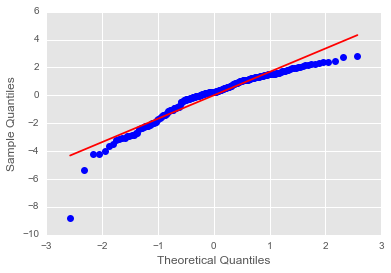

In [29]:
figure = sm.qqplot(model.resid, line = 's')

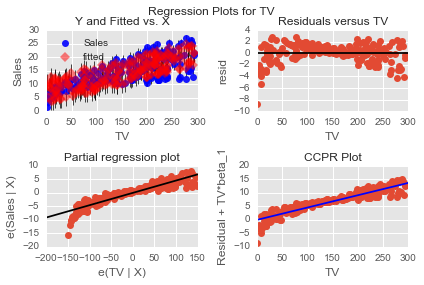

In [30]:
figure = sm.graphics.plot_regress_exog(model, 'TV')

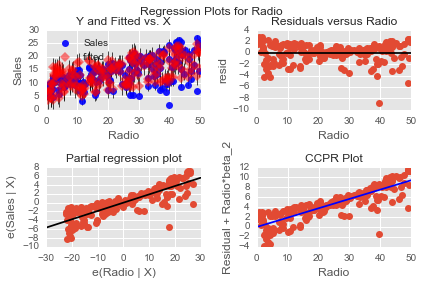

In [31]:
figure = sm.graphics.plot_regress_exog(model, 'Radio')

## Part B - Interaction Effects

### Sales ~ TV + Radio + TV * Radio

In [32]:
model = smf.ols(formula = 'Sales ~ TV + Radio + TV * Radio', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1934.
Date:                Fri, 13 May 2016   Prob (F-statistic):          3.19e-144
Time:                        14:20:16   Log-Likelihood:                -267.07
No. Observations:                 198   AIC:                             542.1
Df Residuals:                     194   BIC:                             555.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      6.7577      0.247     27.304      0.000         6.270     7.246
TV             0.0190      0.002     12.682      0.000         0.016     0.022
Radio          0.0276      0.009      3.089      0.002         0.010     0.045
TV:Radio       0.0011   5.27e-05     20.817      0.000         0.001     0.001
==============================================================================
Omnibus:                      126.182   Durbin-Watson:                   2.241
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1151.060
Skew:                          -2.306   Prob(JB):                    1.12e-250
Kurtosis:                      13.875   Cond. No.                     1.78e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.78e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

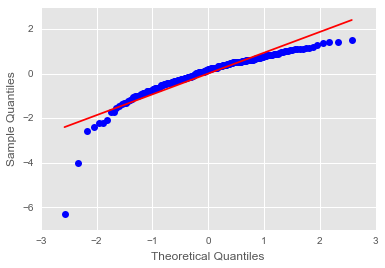

In [33]:
figure = sm.qqplot(model.resid, line = 's')

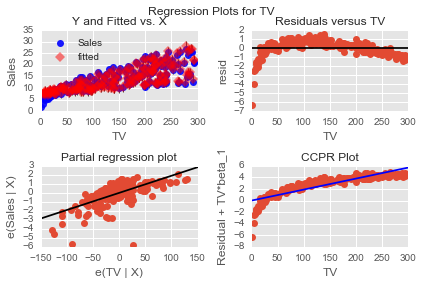

In [34]:
figure = sm.graphics.plot_regress_exog(model, 'TV')

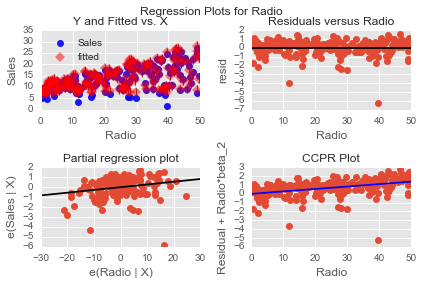

In [35]:
figure = sm.graphics.plot_regress_exog(model, 'Radio')

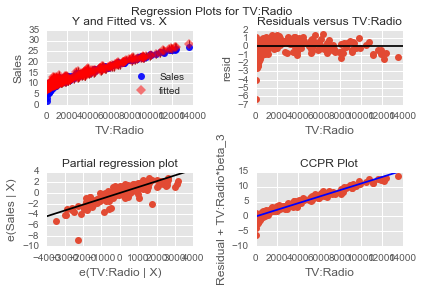

In [36]:
figure = sm.graphics.plot_regress_exog(model, 'TV:Radio')

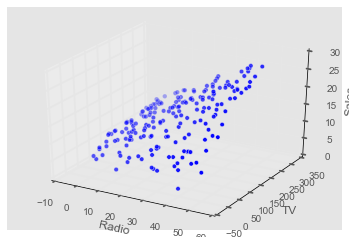

In [37]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['Radio'],df['TV'],df['Sales'])
threedee.set_xlabel('Radio')
threedee.set_ylabel('TV')
threedee.set_zlabel('Sales')
plt.show()

In [43]:
model_test = smf.ols(formula = 'Sales ~ TV * Radio * Newspaper', data = df).fit()
model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     825.9
Date:                Fri, 13 May 2016   Prob (F-statistic):          1.46e-138
Time:                        14:43:02   Log-Likelihood:                -265.42
No. Observations:                 198   AIC:                             546.8
Df Residuals:                     190   BIC:                             573.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              6.5646      0.467     14.043      0.000         5.643     7.487
TV                     0.0197      0.003      7.222      0.000         0.014     0.025
Radio                  0.0205      0.017      1.241      0.216        -0.012     0.053
TV:Radio               0.0011    9.9e-05     11.617      0.000         0.001     0.001
Newspaper              0.0123      0.017      0.711      0.478        -0.022     0.047
TV:Newspaper       -5.211e-05   9.38e-05     -0.555      0.579        -0.000     0.000
Radio:Newspaper    -8.423e-06      0.000     -0.017      0.986        -0.001     0.001
TV:Radio:Newspaper -4.616e-07   2.73e-06     -0.169      0.866     -5.85e-06  4.93e-06
==============================================================================
Omnibus:                      110.904   Durbin-Watson:                   2.233
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              766.480
Skew:                          -2.054   Prob(JB):                    3.64e-167
Kurtosis:                      11.719   Cond. No.                     1.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Part C - Dummy Variables

In [5]:
df = pd.read_csv(os.path.join('zillow-05-starter.csv'), index_col = 'ID')
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,BathCount,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.710,0.0,1.0,NaN,0.550,NaN,1980.0
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.150,0.0,NaN,2.0,1.430,2.435,1948.0
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.600,0.0,2.0,3.5,2.040,3.920,1976.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.500,0.0,1.0,1.0,1.060,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.970,0.0,2.0,2.0,1.299,NaN,1993.0
...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,0.390,1.0,NaN,1.0,0.264,NaN,2012.0
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,0.860,0.0,1.0,1.0,0.691,NaN,2004.0
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,0.830,0.0,3.0,3.0,1.738,2.299,1976.0


In [14]:
df['Bath1'] = df['BathCount'] == 1
df['Bath2'] = df['BathCount'] == 2
df['Bath3'] = df['BathCount'] == 3
df['Bath4'] = df['BathCount'] == 4
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,...,BuiltInYear,Bath1,Bath2,Bath3,Bath4
ID,,,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.710,0.0,1.0,...,1980.0,False,False,False,False
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.150,0.0,NaN,...,1948.0,False,True,False,False
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.600,0.0,2.0,...,1976.0,False,False,False,False
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.500,0.0,1.0,...,1930.0,True,False,False,False
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.970,0.0,2.0,...,1993.0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2124214951,"412 Green St APT A, San Francisco, CA",1/15/16,0.390,1.0,NaN,...,2012.0,True,False,False,False
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,0.860,0.0,1.0,...,2004.0,True,False,False,False
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,0.830,0.0,3.0,...,1976.0,False,False,True,False


In [20]:
df.drop(df[df['IsAStudio'] == 1].index)
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,...,BuiltInYear,Bath1,Bath2,Bath3,Bath4
ID,,,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.710,0.0,1.0,...,1980.0,False,False,False,False
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.150,0.0,NaN,...,1948.0,False,True,False,False
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.600,0.0,2.0,...,1976.0,False,False,False,False
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.500,0.0,1.0,...,1930.0,True,False,False,False
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.970,0.0,2.0,...,1993.0,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2121978635,"829 Folsom St UNIT 906, San Francisco, CA",12/6/15,0.675,0.0,1.0,...,2010.0,True,False,False,False
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,0.860,0.0,1.0,...,2004.0,True,False,False,False
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,0.830,0.0,3.0,...,1976.0,False,False,True,False


In [26]:
model = smf.ols(formula = 'SalePrice ~ BathCount', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     146.6
Date:                Mon, 16 May 2016   Prob (F-statistic):           1.94e-31
Time:                        14:47:27   Log-Likelihood:                -1690.7
No. Observations:                 929   AIC:                             3385.
Df Residuals:                     927   BIC:                             3395.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.3401      0.099      3.434      0.001         0.146     0.535
BathCount      0.5242      0.043     12.109      0.000         0.439     0.609
==============================================================================
Omnibus:                     1692.623   Durbin-Watson:                   1.582
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2167434.305
Skew:                          12.317   Prob(JB):                         0.00
Kurtosis:                     238.345   Cond. No.                         5.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model = smf.ols(formula = 'SalePrice ~ Bath1 + Bath2 + Bath3', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     21.96
Date:                Mon, 16 May 2016   Prob (F-statistic):           9.19e-14
Time:                        14:48:28   Log-Likelihood:                -1890.5
No. Observations:                 971   AIC:                             3789.
Df Residuals:                     967   BIC:                             3809.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         2.1837      0.117     18.625      0.000         1.954     2.414
Bath1[T.True]    -1.1923      0.150     -7.964      0.000        -1.486    -0.899
Bath2[T.True]    -0.9092      0.151     -6.037      0.000        -1.205    -0.614
Bath3[T.True]    -0.7116      0.203     -3.504      0.000        -1.110    -0.313
==============================================================================
Omnibus:                     1665.825   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1194417.734
Skew:                          11.112   Prob(JB):                         0.00
Kurtosis:                     173.377   Cond. No.                         5.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### What's the bathrooms' distribution in the dataset?

In [35]:
print np.nan, df.BathCount.isnull().sum()
for bath_count in np.sort(df.BathCount.dropna().unique()):
    print bath_count, len(df[df.BathCount == bath_count])

nan 42
1.0 333
1.1 1
1.25 1
1.5 37
1.75 1
2.0 323
2.25 1
2.5 44
3.0 105
3.5 18
4.0 33
4.5 6
5.0 10
5.5 2
6.0 8
6.5 1
7.0 2
7.5 1
8.0 1
14.0 1


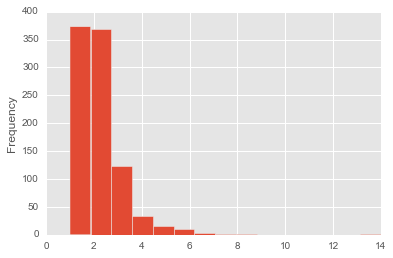

In [36]:
df.BathCount.plot(kind = 'hist', bins = 15)

### Let's keep properties with 1, 2, 3, or 4 bathrooms

In [40]:
df = df[df.BathCount.isin([1,2,3,4])]
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,...,BuiltInYear,Bath1,Bath2,Bath3,Bath4
ID,,,,,,,,,,,
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.150,0.0,NaN,...,1948.0,False,True,False,False
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.500,0.0,1.0,...,1930.0,True,False,False,False
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.970,0.0,2.0,...,1993.0,False,True,False,False
15064295,"111 Chestnut St APT 702, San Francisco, CA",12/17/15,0.940,0.0,2.0,...,1993.0,False,True,False,False
15064391,"1821 Grant Ave APT 101, San Francisco, CA",12/15/15,0.835,0.0,1.0,...,1975.0,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
2121978635,"829 Folsom St UNIT 906, San Francisco, CA",12/6/15,0.675,0.0,1.0,...,2010.0,True,False,False,False
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,0.860,0.0,1.0,...,2004.0,True,False,False,False
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,0.830,0.0,3.0,...,1976.0,False,False,True,False


In [41]:
print np.nan, df.BathCount.isnull().sum()
for bath_count in np.sort(df.BathCount.dropna().unique()):
    print bath_count, len(df[df.BathCount == bath_count])

nan 0
1.0 333
2.0 323
3.0 105
4.0 33


### We can create the dummy variables manually

In [48]:
df['Bath1'] = 0
df['Bath2'] = 0
df['Bath3'] = 0
df['Bath4'] = 0
df.loc[df.BathCount == 1, 'Bath1'] = 1
df.loc[df.BathCount == 2, 'Bath2'] = 1
df.loc[df.BathCount == 3, 'Bath3'] = 1
df.loc[df.BathCount == 4, 'Bath4'] = 1
df.columns
df

,Address,DateOfSale,SalePrice,IsAStudio,BedCount,...,BuiltInYear,Bath1,Bath2,Bath3,Bath4
ID,,,,,,,,,,,
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.150,0.0,NaN,...,1948.0,0,1,0,0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.500,0.0,1.0,...,1930.0,1,0,0,0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.970,0.0,2.0,...,1993.0,0,1,0,0
15064295,"111 Chestnut St APT 702, San Francisco, CA",12/17/15,0.940,0.0,2.0,...,1993.0,0,1,0,0
15064391,"1821 Grant Ave APT 101, San Francisco, CA",12/15/15,0.835,0.0,1.0,...,1975.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2121978635,"829 Folsom St UNIT 906, San Francisco, CA",12/6/15,0.675,0.0,1.0,...,2010.0,1,0,0,0
2126960082,"355 1st St UNIT 1905, San Francisco, CA",11/20/15,0.860,0.0,1.0,...,2004.0,1,0,0,0
2128308939,"33 Santa Cruz Ave, San Francisco, CA",12/10/15,0.830,0.0,3.0,...,1976.0,0,0,1,0


### But we can also use `get_dummies` from `pandas` as well (on `BedCount` for the sake of variety)

In [49]:
beds_df = pd.get_dummies(df.BedCount, prefix = 'Bed')

beds_df

,Bed_1.0,Bed_2.0,Bed_3.0,Bed_4.0,Bed_5.0,Bed_6.0,Bed_7.0,Bed_8.0,Bed_9.0
ID,,,,,,,,,
15063505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15064044,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15064257,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15064295,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15064391,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2121978635,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2126960082,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2128308939,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
df = df.join([beds_df])

df.columns

Index([u'Address', u'DateOfSale', u'SalePrice', u'IsAStudio', u'BedCount',
       u'BathCount', u'Size', u'LotSize', u'BuiltInYear', u'Bath1', u'Bath2',
       u'Bath3', u'Bath4', u'Bed_1.0', u'Bed_2.0', u'Bed_3.0', u'Bed_4.0',
       u'Bed_5.0', u'Bed_6.0', u'Bed_7.0', u'Bed_8.0', u'Bed_9.0'],
      dtype='object')

### `SalesPrice` as a function of `Bath_2`, `Bath_3`, and `Bath_4`

In [53]:
smf.ols(formula = 'SalePrice ~ Bath4 + Bath2 + Bath3', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Mon, 16 May 2016   Prob (F-statistic):           1.49e-07
Time:                        15:17:54   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9914      0.070     14.249      0.000         0.855     1.128
Bath4          1.2120      0.232      5.231      0.000         0.757     1.667
Bath2          0.2831      0.099      2.855      0.004         0.088     0.478
Bath3          0.4808      0.142      3.383      0.001         0.202     0.760
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         5.79
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `SalesPrice` as a function of `Bath_1`, `Bath_3`, and `Bath_4`

In [54]:
smf.ols(formula = 'SalePrice ~ Bath4 + Bath1 + Bath3', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Mon, 16 May 2016   Prob (F-statistic):           1.49e-07
Time:                        15:18:11   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.2745      0.071     18.040      0.000         1.136     1.413
Bath4          0.9290      0.232      4.003      0.000         0.473     1.384
Bath1         -0.2831      0.099     -2.855      0.004        -0.478    -0.088
Bath3          0.1977      0.143      1.386      0.166        -0.082     0.478
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         5.84
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_4`

In [55]:
smf.ols(formula = 'SalePrice ~ Bath4 + Bath2 + Bath1', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Mon, 16 May 2016   Prob (F-statistic):           1.49e-07
Time:                        15:18:27   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      1.4722      0.124     11.881      0.000         1.229     1.715
Bath4          0.7313      0.253      2.886      0.004         0.234     1.229
Bath2         -0.1977      0.143     -1.386      0.166        -0.478     0.082
Bath1         -0.4808      0.142     -3.383      0.001        -0.760    -0.202
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         7.52
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### `SalesPrice` as a function of `Bath_1`, `Bath_2`, and `Bath_3`

In [56]:
smf.ols(formula = 'SalePrice ~ Bath1 + Bath2 + Bath3', data = df).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.78
Date:                Mon, 16 May 2016   Prob (F-statistic):           1.49e-07
Time:                        15:18:40   Log-Likelihood:                -1314.2
No. Observations:                 794   AIC:                             2636.
Df Residuals:                     790   BIC:                             2655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.2035      0.221      9.969      0.000         1.770     2.637
Bath1         -1.2120      0.232     -5.231      0.000        -1.667    -0.757
Bath2         -0.9290      0.232     -4.003      0.000        -1.384    -0.473
Bath3         -0.7313      0.253     -2.886      0.004        -1.229    -0.234
==============================================================================
Omnibus:                     1817.972   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          8069883.811
Skew:                          19.917   Prob(JB):                         0.00
Kurtosis:                     495.280   Cond. No.                         11.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""